## Data Preprocssing

In [ ]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/genai-dataset/merged_result.csv
/kaggle/input/merged-data/merged_data.csv


Image Column ::> photo_image_url
Text Description ::> ai_description


In [46]:
columns_to_load = ['photo_image_url', 'ai_description']
df=pd.read_csv("/kaggle/input/genai-dataset/merged_result.csv",usecols=columns_to_load)

## Checking Image Duplicates

In [47]:
duplicate_count = df['photo_image_url'].duplicated().sum()
print("Dupicates for col 1: ",duplicate_count)
print("shape of col 1: ",df.shape)

Dupicates for col 1:  24791631
shape of col 1:  (24816631, 2)


In [48]:
duplicate_count = df['ai_description'].duplicated().sum()
print("Dupicates for col 2: ",duplicate_count)
print("shape of col 2: ",df.shape)

Dupicates for col 2:  24796273
shape of col 2:  (24816631, 2)


In [49]:
df=df.drop_duplicates()
df=df.reset_index(drop=True)

In [50]:
duplicate_count = df['photo_image_url'].duplicated().sum()
print("Dupicates for col 1: ",duplicate_count)
print("shape of col 1: ",df.shape)

Dupicates for col 1:  0
shape of col 1:  (25000, 2)


In [51]:
duplicate_count = df['ai_description'].duplicated().sum()
print("Dupicates for col 2: ",duplicate_count)
print("shape of col 2: ",df.shape)

Dupicates for col 2:  4642
shape of col 2:  (25000, 2)


In [52]:
df=df.drop_duplicates(subset=['ai_description'])

In [53]:
duplicate_count = df['photo_image_url'].duplicated().sum()
print("Dupicates for col 1: ",duplicate_count)
print("shape of col 1: ",df.shape)

Dupicates for col 1:  0
shape of col 1:  (20358, 2)


In [54]:
duplicate_count = df['ai_description'].duplicated().sum()
print("Dupicates for col 2: ",duplicate_count)
print("shape of col 2: ",df.shape)

Dupicates for col 2:  0
shape of col 2:  (20358, 2)


In [ ]:
# List of image URLs (duplicates) to remove
urls_to_remove = [
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1701192455496-a095e6e5f792",
    "https://images.unsplash.com/photo-1550392809-057f62c804c0",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1695219820032-34cfa7950b09",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1677636665443-2276041868e7",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1675826638532-09d5c136dd7a",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1675826725982-e8508781c558",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1676660359441-c620089f798a",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1675446536649-e0d90add63bb",
    "https://images.unsplash.com_TheBeach.jpg",
    "https://images.unsplash.com-grass-sun.jpg",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1669842336797-4dfc03afa025",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1700391373098-cd9acd1b7e7c",
    "https://images.unsplash.com/photo-1561114465-468b701ad3d1",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1700567963303-1b83673c52a4",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1676667573119-40081df5d920",
    "https://images.unsplash.com/photo-1565140953764-635d677aa0f2",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1678382343928-825f71ac5856",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1673980029859-9e5ddaee1577",
    "https://images.unsplash.com/photo-1541273673906-98f5bb30d5d6",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1664547606960-008623079291",
    "https://images.unsplash.com/photo-1578308175084-0cfbca809d29",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1695635230516-e69891d27488",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1690325099431-1e536ba176bf",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1668883188879-3a7acd2bec58",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1700984292461-fa2d83c28c6b",
    "https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1696839602315-4bf9599635f2"
]

# Remove rows with specified URLs
df = df[~df["images_url"].isin(urls_to_remove)]


In [55]:
df.isnull().sum()

photo_image_url    0
ai_description     1
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.shape

(20357, 2)

In [61]:
duplicate_count = df['photo_image_url'].duplicated().sum()
print("Dupicates for col 1: ",duplicate_count)
print("shape of col 1: ",df.shape)

Dupicates for col 1:  0
shape of col 1:  (20357, 2)


In [62]:
duplicate_count = df['ai_description'].duplicated().sum()
print("Dupicates for col 2: ",duplicate_count)
print("shape of col 2: ",df.shape)

Dupicates for col 2:  0
shape of col 2:  (20357, 2)


In [63]:
d=df['photo_image_url']
d[0]

'https://images.unsplash.com/photo-1544918334-2fda2e3e7a77'

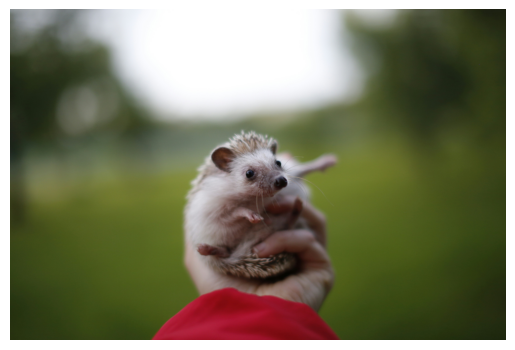

In [ ]:
import matplotlib.pyplot as plt
import requests
from PIL import Image

# URL of the image
url = d[2000]

# Fetch the image from the URL
response = requests.get(url, stream=True)
image = Image.open(response.raw)

# Display the image
plt.imshow(image)
plt.axis('off')  
plt.show()


In [66]:
df.head()

,photo_image_url,ai_description
0,https://images.unsplash.com/photo-1544918334-2...,a black and white photo of a sand dune
1,https://images.unsplash.com/photo-1549231634-c...,selective focus photography of petaled flower
2,https://images.unsplash.com/photo-1550551234-2...,brown sand
3,https://images.unsplash.com/photo-156587078342...,man jumping in desert at daytime
4,https://images.unsplash.com/photo-159048680389...,body of water during sunset


## Style GAN

In [25]:
import os
import requests
import PIL
from PIL import Image
from io import BytesIO
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
import math
Image.MAX_IMAGE_PIXELS = None

In [ ]:
class ImageDataset(Dataset):
    """
    A PyTorch Dataset for handling image data and associated text descriptions.
    """
    
    def __init__(self, df, transform=None):
        """
        Initializes the dataset.
        """
        self.data = df
        self.transform = transform
    
    def __len__(self):
        """
        Returns the total number of samples in the dataset.
        """
        return len(self.data)
    
    def __getitem__(self, idx):
        """
        Retrieves an image and its associated description at the given index.
        """
        img_url = self.data.iloc[idx]['photo_image_url']
        description = self.data.iloc[idx]['ai_description']
        
        try:
            response = requests.get(img_url, stream=True, timeout=10)
            response.raise_for_status()  
            img = Image.open(BytesIO(response.content)).convert('RGB')
            
            if self.transform:
                img = self.transform(img)
            
            return img, description
        
        except (requests.exceptions.RequestException, OSError, PIL.UnidentifiedImageError) as e:
            print(f"Error loading image from URL: {img_url}, Error: {e}")
            
            img = torch.zeros(3, 256, 256)  
            
            return img, description


# Image transformation pipeline (resizing, comverting to tensor, normalizing)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

In [ ]:
dataset = ImageDataset(df=df, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
class MappingNetwork(nn.Module):
    """
    A neural network for mapping latent vectors to an intermediate space. 
    Often used in GAN architectures to introduce non-linear transformations 
    between the latent space and the generator or discriminator.
    """
    def __init__(self, latent_dim, intermediate_dim):
        """
        Initializes the MappingNetwork.
        """
        super().__init__()
        layers = []
        for _ in range(8):  
            layers.append(nn.Linear(latent_dim, intermediate_dim))
            layers.append(nn.LeakyReLU(0.2))
        self.network = nn.Sequential(*layers)
    
    def forward(self, z):
        """
        Defines the forward pass of the network. Input latent vector of shape (batch_size, latent_dim).
        Returns a Tensor - Transformed vector of shape (batch_size, intermediate_dim).
        """
        return self.network(z)


In [ ]:
class SynthesisBlock(nn.Module):
    """
    A building block for the synthesis network in StyleGAN-like architectures.

    This block performs upsampling, convolutional operations, and adaptive instance normalization (AdaIN) 
    to refine and scale feature maps, ultimately contributing to the generation of high-resolution images.
    """
    def __init__(self, in_channels, out_channels, resolution):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.upsample = nn.Upsample(scale_factor=2)
        self.adain1 = nn.InstanceNorm2d(out_channels)
        self.adain2 = nn.InstanceNorm2d(out_channels)
        self.relu = nn.LeakyReLU(0.2)
    
    def forward(self, x, w):
        """
        Initializes the SynthesisBlock.
          - in_channels (int): Number of input channels.
          - out_channels (int): Number of output channels.
          - resolution (int): The resolution of the output feature map.
        """
        x = self.relu(self.adain1(self.conv1(self.upsample(x))))
        x = self.relu(self.adain2(self.conv2(x)))
        return x


## Generator Class

In [ ]:
class Generator(nn.Module):
    """
    A generator network for a GAN (e.g., StyleGAN-like architecture) that synthesizes 
    high-resolution images from a latent vector. 

    The generator consists of two main components:
        - A mapping network to transform the latent vector into a style vector (w-space).
        - A synthesis network composed of progressive synthesis blocks that generate the image.
    """
    def __init__(self, latent_dim, resolution=256):
        """
        Initializes the generator.
        """
        super().__init__()
        self.mapping = MappingNetwork(latent_dim, latent_dim)
        self.synthesis_blocks = nn.ModuleList()
        for i in range(int(math.log2(resolution)) - 2): 
            in_channels = 512 // (2 ** i)
            out_channels = 512 // (2 ** (i + 1))
            self.synthesis_blocks.append(SynthesisBlock(in_channels, out_channels, resolution))
        self.output_layer = nn.Conv2d(out_channels, 3, kernel_size=1)
    
    def forward(self, z, device): 
        """
        Defines the forward pass of the generator.
        """
        w = self.mapping(z)
        x = torch.randn(z.shape[0], 512, 4, 4).to(device)  
        for block in self.synthesis_blocks:
            x = block(x, w)
        return torch.tanh(self.output_layer(x))

## Discriminator Class

In [ ]:
class Discriminator(nn.Module):
    """
    A discriminator network for a GAN architecture that evaluates whether an input image 
    is real or generated (fake). 

    This network progressively downsamples the input image using convolutional layers and 
    applies a final fully connected layer to produce a single scalar output.
    """
    def __init__(self, resolution=256):
        """
        Initializes the discriminator.
        """
        super().__init__()
        self.initial_layer = nn.Conv2d(3, 512, kernel_size=7, stride=2, padding=3)  
        layers = []
        for i in range(int(math.log2(resolution)) - 2):
            in_channels = 512 // (2 ** i)
            out_channels = 512 // (2 ** (i + 1))
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1))
            layers.append(nn.LeakyReLU(0.2))
        self.network = nn.Sequential(*layers)

        dummy_input = torch.randn(1, 3, resolution, resolution)
        dummy_output = self.network(self.initial_layer(dummy_input))
        fc_input_size = dummy_output.view(1, -1).shape[1] 

        self.fc = nn.Linear(fc_input_size, 1)  

    def forward(self, img):
        """
        Defines the forward pass of the discriminator.
        """
        x = self.initial_layer(img) 
        x = self.network(x)
        
        x = x.view(x.size(0), -1)  
        
        return self.fc(x) 

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Training the StyleGAN Model

In [ ]:
def train_gan(generator, discriminator, dataloader, latent_dim, device, num_epochs=100, lr=1e-4):
    """
    Train a GAN with the given generator and discriminator models.

    Include:
        generator (nn.Module): The generator model.
        discriminator (nn.Module): The discriminator model.
        dataloader (DataLoader): The data loader providing real images.
        latent_dim (int): Dimensionality of the latent vector (z-space).
        device (torch.device): The device to run the training on (CPU or GPU).
        num_epochs (int, optional): Number of training epochs (default: 100).
        lr (float, optional): Learning rate for the optimizers (default: 1e-4).
    """
    optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(0.0, 0.99))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.0, 0.99))
    
    criterion = nn.BCEWithLogitsLoss()
    
    for epoch in range(num_epochs):
        for real_images, _ in dataloader:
            real_images = real_images.to(device)
            batch_size = real_images.size(0)
            
            z = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(z, device)
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)
            
            real_loss = criterion(discriminator(real_images), real_labels)
            fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)
            d_loss = real_loss + fake_loss
            optimizer_d.zero_grad()
            d_loss.backward()
            optimizer_d.step()
            
            g_loss = criterion(discriminator(fake_images), real_labels)
            optimizer_g.zero_grad()
            g_loss.backward()
            optimizer_g.step()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Train the Model
latent_dim = 512
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

train_gan(generator, discriminator, dataloader, latent_dim, device)

Error loading image from URL: https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1701192455496-a095e6e5f792, Error: 404 Client Error: Not Found for url: https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1701192455496-a095e6e5f792
Error loading image from URL: https://images.unsplash.com/photo-1550392809-057f62c804c0, Error: HTTPSConnectionPool(host='images.unsplash.com', port=443): Read timed out. (read timeout=10)
Error loading image from URL: https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1695219820032-34cfa7950b09, Error: 404 Client Error: Not Found for url: https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1695219820032-34cfa7950b09
Error loading image from URL: https://images.unsplash.com/unsplash-premium-photos-production/premium_photo-1677636665443-2276041868e7, Error: 404 Client Error: Not Found for url: https://images.unsplash.com/unsplash-premium-photos-production/pre

KeyboardInterrupt: 

## Saving the Models

In [ ]:
generator_save_path = "stylegan_generator.pth"
discriminator_save_path = "stylegan_discriminator.pth"

torch.save(generator.state_dict(), generator_save_path)
torch.save(discriminator.state_dict(), discriminator_save_path)

print(f"Generator saved at {generator_save_path}")
print(f"Discriminator saved at {discriminator_save_path}")